# Урок 10. Дисперсионный анализ

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import matplotlib.pyplot as plt
import seaborn as sns

***
## Задание 1

### Даны значения роста в трех группах случайно выбранных спортсменов. Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.

In [2]:
hf = np.array([173, 175, 180, 178, 177, 185, 183, 182])
hf

array([173, 175, 180, 178, 177, 185, 183, 182])

In [3]:
hh = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
hh

array([177, 179, 180, 188, 177, 172, 171, 184, 180])

In [4]:
hw = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])
hw

array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

### Проведем разведочный анализ на выполение условий применимости дисперсионного анализа

#### 1.	Значения групп должны следовать нормальному распределению

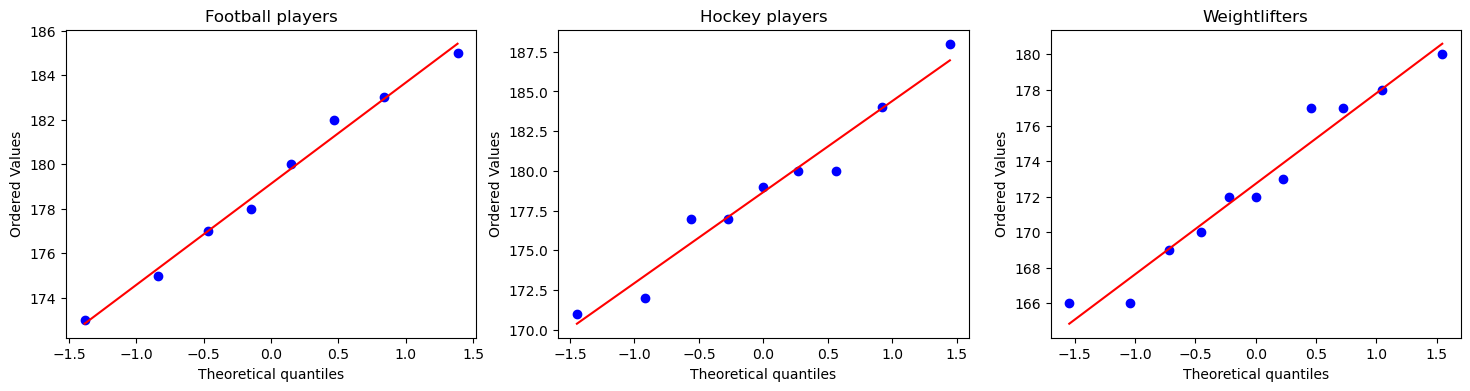

In [5]:
plt.figure(figsize = [6*3, 4])

plt.subplot(1, 3, 1)
stats.probplot(hf, dist="norm", plot=plt)
plt.title(f'Football players')

plt.subplot(1, 3, 2)
stats.probplot(hh, dist="norm", plot=plt)
plt.title(f'Hockey players')

plt.subplot(1, 3, 3)
stats.probplot(hw, dist="norm", plot=plt)
plt.title(f'Weightlifters');

На QQ-графиках мы видим, что распределения роста спортсменов внутри групп близки к норамльному.

Проведем тест Шапиро-Уилко. За нулевую гипотезу принимем гипотезу о том, что выборки принадлежат генеральным совокупностям, где значения распределены нормально. Примем $\alpha = 0.05$.

In [6]:
print(f'Football players: {stats.shapiro(hf)}')

Football players: ShapiroResult(statistic=0.9775082468986511, pvalue=0.9495404362678528)


Т.к. $p-value > \alpha$, то гипотезу о нормальном распределении роста футболистов на уровне значимости $0.05$ **принимаем**.

In [7]:
print(f'Hockey players: {stats.shapiro(hh)}')

Hockey players: ShapiroResult(statistic=0.9579196572303772, pvalue=0.7763139009475708)


Т.к. $p-value > \alpha$, то гипотезу о нормальном распределении роста хоккеистов на уровне значимости $0.05$ **принимаем**.

In [8]:
print(f'Weightlifters: {stats.shapiro(hw)}')

Weightlifters: ShapiroResult(statistic=0.9386808276176453, pvalue=0.5051165223121643)


Т.к. $p-value > \alpha$, то гипотезу о нормальном распределении роста штангистов на уровне значимости $0.05$ **принимаем**.

Т.о. можем принять, что значения всех групп следовуют нормальному распределению.

#### 2. Однородность дисперсий

Проведем проверку на однородность дисперсий с помощью Барлетт-теста. За нулевую гипотезу примем, что дисперсии во всех группах однородны. Уровень значимости $\alpha=0.05$.

In [9]:
stats.bartlett(hf, hh, hw)

BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)

Т.к. $p-value > \alpha$, то гипотезу об однородности дисперсии роста спортсменов в группах на уровне значимости $0.05$ **принимаем**.

### Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.

$H_0: \mu_1 = \mu_2 = \mu_3$ - средний рост спортсмена не зависит от вида спорта, которым он занимается. \
$H_1: \mu_1 \not= \mu_2 \not= \mu_3$ - средний рост спортсмена зависит от выбранного им спорта. \
Примем уровень значимости $\alpha = 0.05$.

Воспользуемся встроенным методом однофакторного дисперсионного анализа библиотеки scipy:

In [10]:
stats.f_oneway(hf, hh, hw)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

Т.к. $p-value < \alpha$, то гипотезу о том, что средний рост спортсмена не зависит от вида спорта, которым он занимается на уровне значимости $0.05$ **отвергаем**.

### Post hoc test

Чтобы посмотреть какие именно группы разничаются между собой проведем post hoc test.

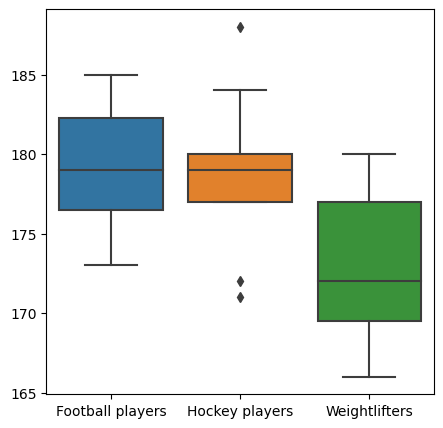

In [17]:
plt.figure(figsize=(5, 5))

sns.boxplot(data=[hf, hh, hw]);

plt.xticks([0, 1, 2], ['Football players', 'Hockey players', 'Weightlifters']);

In [12]:
df = pd.DataFrame({
    'height': np.hstack([hf, hh, hw]),
    'group': np.array(['hf']*hf.shape[0] + ['hh']*hh.shape[0] + ['hw']*hw.shape[0])
})
df

,height,group
0,173,hf
1,175,hf
2,180,hf
3,178,hf
4,177,hf
5,185,hf
6,183,hf
7,182,hf
8,177,hh
9,179,hh


In [13]:
tukey = pairwise_tukeyhsd(endog=df['height'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    hf     hh  -0.4583  0.979  -6.2732  5.3566  False
    hf     hw  -6.3977 0.0219 -11.9583 -0.8372   True
    hh     hw  -5.9394 0.0284 -11.3181 -0.5607   True
-----------------------------------------------------


Между ростом футболистов и хоккеистов статистически значимых различий не обнаружено.